In [2]:
from PIL import Image
# import torch transforms


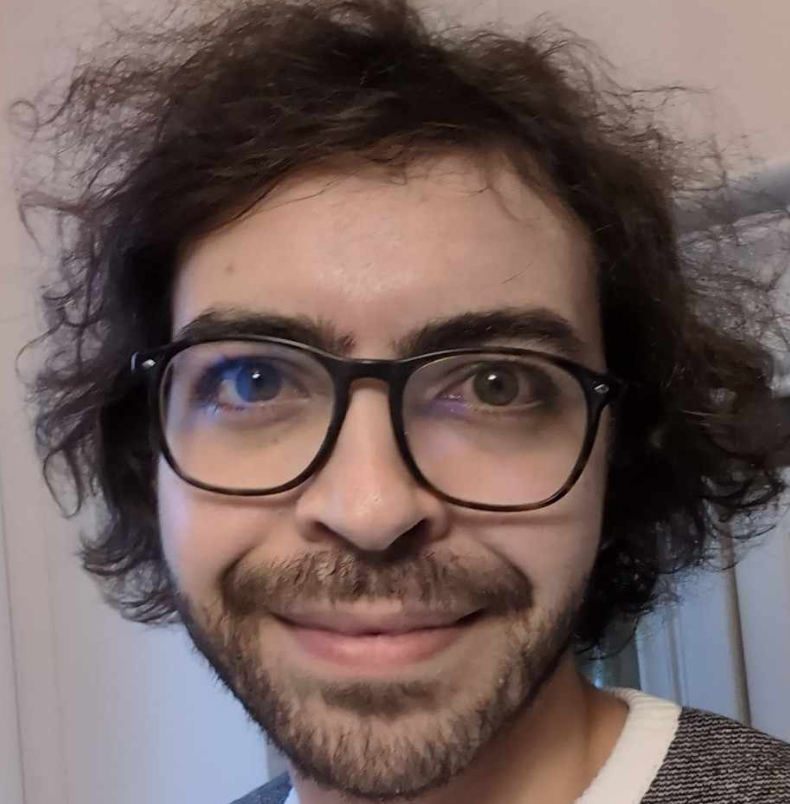

In [4]:
ref_image = Image.open('./training_data/phil/phil_head.png')
ref_image

In [7]:
import torchvision.transforms as transforms

train_transform = transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(512),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.Pad(30),
])

transformed_image = train_transform(ref_image)


In [18]:
def compute_transparency_mask(image):
    """Compute transparency mask for an image.
    Args:
        image (PIL.Image): Input image.
    Returns:
        PIL.Image: Inverted Transparency mask.
    """
    if image.mode != 'RGBA':
        image = image.convert('RGBA')
    alpha = image.split()[3]
    mask = Image.eval(alpha, lambda a: 255 if a <=128 else 0)
    return mask

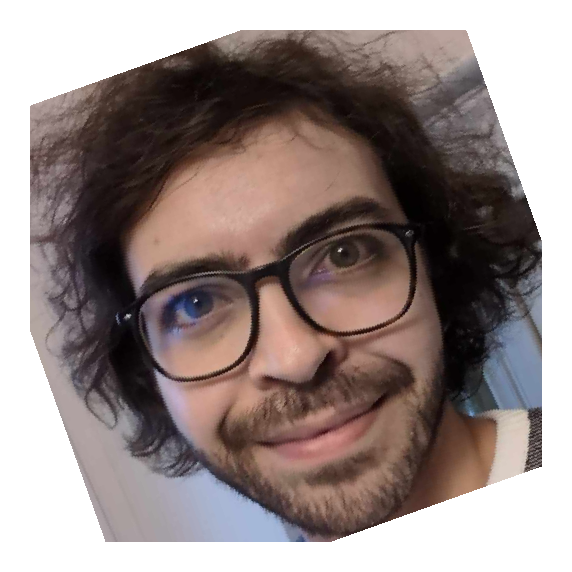

In [19]:
transformed_image = train_transform(ref_image)
transformed_image

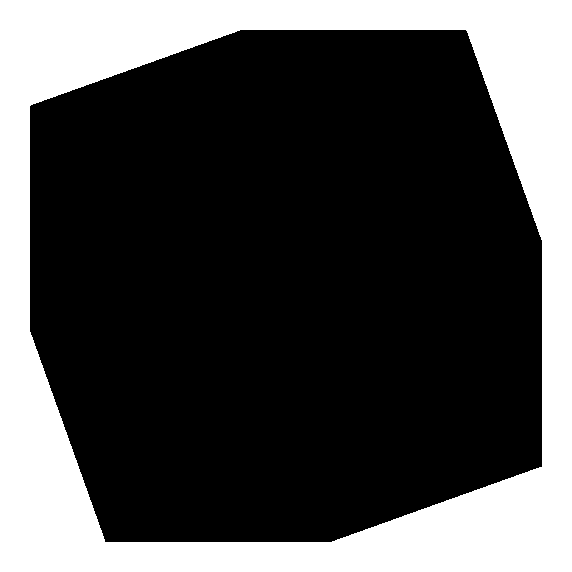

In [20]:
compute_transparency_mask(transformed_image)